# Exercise 1

A survey was conducted to gauge an audience interest in different data science topics, namely:

* Big Data (Spark / Hadoop)
* Data Analysis / Statistics
* Data Journalism
* Data Visualization
* Deep Learning
* Machine Learning

The participants had three options for each topic: Very Interested, Somewhat interested, and Not interested. 2,233 respondents completed the survey.

The survey results have been saved in a csv file and can be accessed through this link: https://cocl.us/datascience_survey_data.

If you examine the csv file, you will find that the first column represents the data science topics and the first row represents the choices for each topic.

In [13]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://cocl.us/datascience_survey_data", index_col=0)
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


Use the artist layer of Matplotlib to replicate the bar chart below to visualize the percentage of the respondents' interest in the different data science topics surveyed.

Sort the dataframe in descending order of `Very interested`.

In [3]:
df.sort_values(by='Very interested', ascending=False, inplace=True)
df

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [4]:
df.sum(1)

Data Analysis / Statistics    2192
Machine Learning              2180
Data Visualization            2176
Big Data (Spark / Hadoop)     2188
Deep Learning                 2169
Data Journalism               2120
dtype: int64

Convert the numbers into percentages of the total number of respondents. Recall that **2,233** respondents completed the survey. Round percentages to 2 decimal places.

In [5]:
#df_per = np.round(df / 2233 * 100, 2)
n_respondents = 2233
df_per = (df / n_respondents * 100).round(2)
df_per

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


In [6]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  2.1.0


for the chart:
* use a figure size of (20, 8),
* bar width of 0.8,
* use color #5cb85c for the Very interested bars, color #5bc0de for the Somewhat interested bars, and color #d9534f for the Not interested bars,
* use font size 14 for the bar labels, percentages, and legend,
* use font size 16 for the title, and,
* display the percentages above the bars as shown above, and remove the left, top, and right borders.

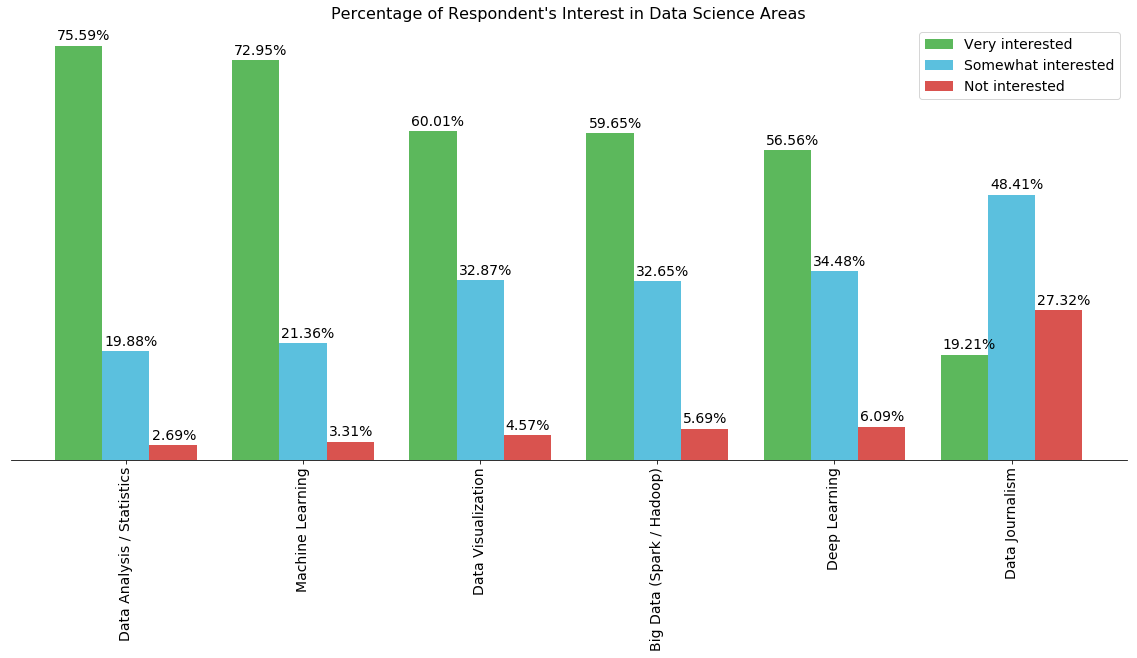

In [7]:
ax = df_per.plot(kind='bar', figsize=(20, 8), width=0.8, color=('#5cb85c', '#5bc0de', '#d9534f'), fontsize=14)

ax.set_title("Percentage of Respondent's Interest in Data Science Areas", fontsize=16)
ax.legend(fontsize=14)

ax.tick_params(top='off', bottom='on', left='off', right='off', labelleft='off', labelbottom='on')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

for p in ax.patches:
    ax.annotate(str(p.get_height()) + "%", xy=(p.get_x()+0.012, p.get_height()+1), fontsize=14)

# Exercise 2

In [8]:
sanfra_crime_df = pd.read_csv('https://cocl.us/sanfran_crime_dataset')
sanfra_crime_df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [9]:
sanfra_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 13 columns):
IncidntNum    150500 non-null int64
Category      150500 non-null object
Descript      150500 non-null object
DayOfWeek     150500 non-null object
Date          150500 non-null object
Time          150500 non-null object
PdDistrict    150499 non-null object
Resolution    150500 non-null object
Address       150500 non-null object
X             150500 non-null float64
Y             150500 non-null float64
Location      150500 non-null object
PdId          150500 non-null int64
dtypes: float64(2), int64(2), object(9)
memory usage: 14.9+ MB


In [10]:
sanfra_crime_df.groupby(['PdDistrict'])['IncidntNum'].count().to_frame().reset_index().sort_values(by='IncidntNum', ascending=False)

,PdDistrict,IncidntNum
7,SOUTHERN,28445
4,NORTHERN,20100
3,MISSION,19503
1,CENTRAL,17666
0,BAYVIEW,14303
2,INGLESIDE,11594
8,TARAVAL,11325
9,TENDERLOIN,9942
6,RICHMOND,8922
5,PARK,8699


In [11]:
sanfra_crime_df_grp = sanfra_crime_df['PdDistrict'].value_counts().to_frame().reset_index()
sanfra_crime_df_grp.columns = ['Neighborhood', 'Count']
sanfra_crime_df_grp

,Neighborhood,Count
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


In [12]:
sanfra_geo = r'san-francisco.json'